EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345
EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [135]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib as plt

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [10]:
# H0: mu = 13.20
# H1: mu < 13.20
a = .01

# Calculate the test statistic
t_test = (xbar - 109)/(s/np.sqrt(df.shape[0]))
#test statistic
t_test
0.8971529586323553
# Calculate p-value
1 - stats.t.cdf(t_test, 39)
0.18757115929257173
# Use stats.ttest_1samp() to calculate the test statistic and p-value
oneSamp = stats.ttest_1samp(df.VIQ, 109, alternative="greater")
oneSamp
Ttest_1sampResult(statistic=0.897152958632355, pvalue=0.1875711592925718)
#Display p-value
oneSamp.pvalue
0.1875711592925718
# Compare p-value and alpha
alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

In [4]:
x_bar = 12.20
std = 2.5
sample = 40

In [7]:
t_test = (x_bar - 13.20)/(std/np.sqrt(sample))
t_test

-2.5298221281347035

In [24]:
oneSamp = stats.norm.cdf(t_test)
oneSamp

0.005706018193000826

In [25]:
alpha = 0.01
if oneSamp < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [31]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [227]:
df = pd.read_csv("soil - Sheet1.csv", encoding="utf-8")

In [84]:
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


---

In [41]:
# the series are not same length 
# data is cleaned to make its series same length

In [211]:
df.isnull().sum()

Soil1    5
Soil2    0
dtype: int64

C:\Users\gurka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Soil2'>

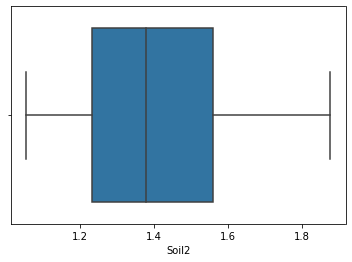

In [137]:
sns.boxplot(df.Soil2)

In [230]:
# NaN values are assigned as median of the Series
df.Soil1[df.Soil1.isna() == True] = df.Soil1.median()

In [218]:
df.isnull().sum()

Soil1    0
Soil2    0
dtype: int64

In [229]:
df.Soil1.mean()

1.6918000000000002

---

In [233]:
print(df.Soil1.mean())
print(df.Soil2.mean())

1.6893999999999998
1.4171142857142855


In [232]:
indTest = stats.ttest_ind(df.Soil1, df.Soil2, equal_var = True,)
indTest 

Ttest_indResult(statistic=5.538568843188105, pvalue=5.334774760912842e-07)

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [259]:
e_3 = pd.read_csv("2015 PISA Test - Sheet1.csv", encoding="utf-8")

In [235]:
e_3.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [237]:
e_3.isnull().sum()

Country Code              0
Continent_Code            5
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [239]:
# e_3.dropna(inplace=True)

In [240]:
e_3.describe()

,internet_users_per_100,Math,Reading,Science
count,65.000000,65.000000,65.000000,65.000000
mean,72.364354,463.796218,462.118551,467.535888
std,16.570118,51.293822,48.443166,45.762751
min,21.976068,359.606200,346.549000,375.745100
25%,63.306625,417.991900,427.141000,427.997800
50%,73.098700,478.644800,481.439100,475.408900
75%,85.052900,501.729800,499.814600,502.575100
max,98.200000,564.189700,535.100200,555.574700


In [253]:
e_3.groupby("Continent_Code").agg(["count","mean","median","std"])

internet_users_per_100                                   Math  \
                                count       mean     median        std count   
Continent_Code                                                                 
AF                                  2  43.359918  43.359918   7.297226     2   
AS                                 17  68.455613  74.000000  21.086060    17   
EU                                 37  77.274888  76.184000  12.425773    37   
OC                                  2  86.391704  86.391704   2.589686     2   
SA                                  7  60.180494  64.289000   9.772455     7   

                                                 Reading              \
                      mean     median        std   count        mean   
Continent_Code                                                         
AF              363.212100  363.21210   5.099513       2  355.457400   
AS              466.216647  459.81600  64.356490      17  454.059682   
EU              477.981449  489.72870  35.150403      37  476.164608   
OC              494.559750  494.55975   0.938401       2  506.085650   
SA              402.887700  409.03330  18.128894       7  425.359229   

                                     Science                                    
                   median        std   count        mean     median        std  
Continent_Code                                                                  
AF              355.45740   7.916909       2  381.074250  381.07425   7.536556  
AS              433.54230  57.048962      17  467.945847  456.48360  56.671371  
EU              487.25010  37.720545      37  478.299381  490.22500  34.450616  
OC              506.08565   4.504341       2  511.648700  511.64870   2.340241  
SA              425.30310  19.709688       7  421.747186  424.59050  18.470319

In [265]:
math_EU = e_3.Math[e_3.Continent_Code == "EU"]
math_EU

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [266]:
math_AS = e_3.Math[e_3.Continent_Code == "AS"]
math_AS

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

In [263]:
e_3.Math[e_3.Continent_Code == "EU"].count()

37

In [262]:
e_3.Math[e_3.Continent_Code == "AS"].count()

17

In [267]:
oneSamp3 = stats.ttest_ind(math_EU, math_AS)
oneSamp3

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128